In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
from scipy import signal
from scipy.optimize import curve_fit
import scipy.io

#custom made functions
import utils
import functions as fn

### Sparse and dense noise

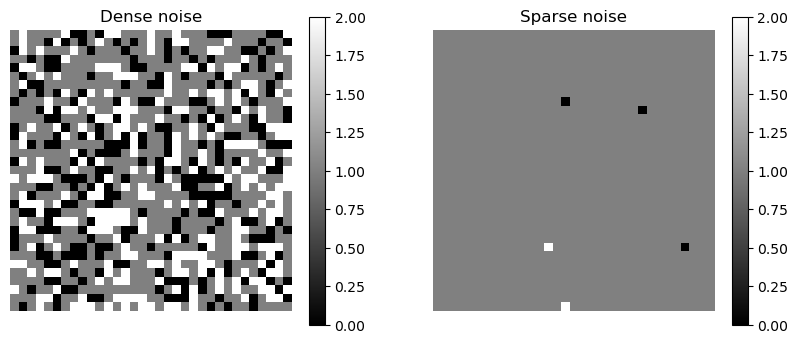

In [2]:
N = 33
#dense noise
dn = fn.getDenseNoise(N)
#sparse noise
ns=np.round(N*N*0.01)
sn = fn.getSparseNoise(N,ns)

plt.rcParams['figure.figsize'] = [10,4]
plt.subplot(1,2,1)
plt.title('Dense noise')
plt.imshow(dn,cmap='gray')
plt.axis('off')
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Sparse noise')
plt.imshow(sn,cmap = 'gray')
plt.axis('off')
plt.colorbar()
plt.show()

### Run the model for Fig 5

In [3]:
#Get w0, w1
cm = 1.0; N = 33; sf0 = 4/N; theta = 0; phase = 0.0; std = 1/(8*sf0) 

w0 = fn.getGabor(cm,sf0,theta,N,phase,std)
A = np.sum(np.absolute(w0));w0 = w0/A

w1 = fn.getGabor(cm,sf0,theta,N,phase+np.pi/2,3*std)
Aw = np.sum(np.absolute(w1));w1 = w1/Aw

In [4]:
lamdas=[64,32,16,8,4,2,1,0.5,0.25,0.125,0]

alpha = 0.2; pa2m = 0.5; minIterations = 20; lr = 0.1
iterations = 100
ns=np.round(N*N*0.01)

J={}; QDict = {}; RDict = {} #takes only the last value
noiseFlags = ['sparse','dense']
for noiseF in noiseFlags:
    for lamda in lamdas:
    
        #print(f'noise flag is {noiseF} and lamda {lamda}')
        QDict[(noiseF,lamda)] = np.zeros(iterations)
        RDict[(noiseF,lamda)] = np.zeros(iterations)
        for iteration in np.arange(iterations):
            if noiseF == 'sparse':
                stim = fn.getSparseNoise(N,ns)
            else:
                stim = fn.getDenseNoise(N)
        
            J,RDict[(noiseF,lamda)][iteration],QDict[(noiseF,lamda)][iteration] = fn.feedforwardModel(stim,w0,w1,lamda,lr,alpha,pa2m)
            #print(f'Q is {QDict[(noiseF,lamda)][iteration]} and R {RDict[(noiseF,lamda)][iteration]}')

Q is 0.0015374291234287463 and R 0.005161626375956145
Q is -7.602400948769628e-07 and R 0.005262690600532813
Q is 0.014100259323552577 and R 0.004905022067210893
Q is -9.92598042648396e-08 and R 0.005195115376058025
Q is 0.006491026719260551 and R 0.005391705965490063
Q is 3.155509892271979e-08 and R 0.005191290648532622
Q is 1.2287932876775542e-07 and R 0.00527539832704001
Q is -0.01719365341098883 and R 0.004907681495680972
Q is 1.6693764703923364e-09 and R 0.005125271533608175
Q is 0.01799000081658686 and R 0.005131563448234751
noise flag is sparse and lamda 16
Q is -3.3297253843045382e-12 and R 0.005119197280184109
Q is 7.161996952165239e-07 and R 0.005011471437784935
Q is 4.792338808567997e-07 and R 0.005320812960383021
Q is 1.4437144874035468e-07 and R 0.005187957952365239
Q is -0.005768802731259126 and R 0.005101441091502613
Q is -0.0003263933203486724 and R 0.0052648828189808365
Q is 3.653725051566692e-06 and R 0.005537028076816703
Q is 1.6800229223346008e-06 and R 0.0052802951

Q is -1.207665232760835e-06 and R 0.004923689206452234
Q is -7.184480993460696e-08 and R 0.0052001690468103726
Q is -0.004980900652471532 and R 0.005001262854080877
Q is 9.492153523749103e-07 and R 0.005009769329933458
Q is -2.853883795950196e-12 and R 0.0051028955609770535
Q is 5.551115123125783e-17 and R 0.005135042735956791
Q is 5.551115123125783e-17 and R 0.005139136245344152
Q is 1.865706367176756e-09 and R 0.005133547146752071
Q is -0.018368845137288037 and R 0.004641341100815497
Q is -1.2930882076211958e-07 and R 0.005195190905530101
Q is -0.005399729486363636 and R 0.005120813532155599
Q is -2.6532884223051667e-09 and R 0.005141966763718607
Q is -2.572779999043817e-07 and R 0.005276205107610766
Q is -0.0004643879203367063 and R 0.005264511698935604
Q is 1.9397142958510472e-07 and R 0.005202351233798719
Q is 3.926520542041345e-08 and R 0.005191876907618706
Q is 0.005399857485452353 and R 0.005188697546117706
Q is 0.000551108011644208 and R 0.005371803738022813
noise flag is spar

Q is 0.000417271309654188 and R 0.005160251568519908
Q is -0.01836904548596968 and R 0.005096432782165492
Q is 0.0004678524904994097 and R 0.005359031159102547
Q is 0.013648634494985323 and R 0.004724187064552888
Q is 3.209710275342559e-12 and R 0.005141230225758094
Q is 0.0002830086438322943 and R 0.004821730026275637
Q is 7.184480999011811e-08 and R 0.005217172725266646
Q is -5.551115123125783e-16 and R 0.005145077545915098
Q is -0.006936526918647656 and R 0.004961100752294591
Q is 0.026464902863936934 and R 0.004781131483465115
Q is 2.009336710351306e-07 and R 0.005226381977713645
Q is 0.00046438792033692833 and R 0.005294674025376702
Q is -0.0005844417801822432 and R 0.005485911180886039
Q is -0.00013343323305858856 and R 0.005559390442248464
Q is 0.010131148551772329 and R 0.004881833681788673
Q is 5.551115123125783e-17 and R 0.005156846176787045
Q is 8.126277428743833e-13 and R 0.005143021430845382
Q is -0.00019232324511864185 and R 0.005266081176533122
Q is 0.0031123705456438944

Q is 0.0035170141036194313 and R 0.004933710481890868
Q is 5.551115123125783e-17 and R 0.0044938008826251215
Q is 0.01633174771636947 and R 0.004530486445489286
Q is 9.908740494779522e-13 and R 0.005161037435641048
Q is -0.0004678119632800515 and R 0.005023494768053929
Q is -0.011478936664514161 and R 0.004825010077260353
Q is 7.730063811273169e-10 and R 0.005168597259792089
Q is 1.938274616586355e-06 and R 0.0055312209762267
Q is 4.5394950742849716e-07 and R 0.005468666715053845
Q is -0.005307740056898325 and R 0.00476535950721251
Q is 5.2297055574968e-13 and R 0.005170925611890765
Q is 0.007551657998362271 and R 0.004889052114288613
Q is 0.01528706225147819 and R 0.0045442804768571765
Q is -2.0396778022124806e-07 and R 0.0052648431720245395
Q is -0.006300435953970063 and R 0.005225678232258848
Q is 0.004646747475053614 and R 0.005211595444572491
Q is -0.012950871270452968 and R 0.005214706434998124
Q is -0.023766525087478674 and R 0.005328749438065083
Q is -0.0071823500711183375 and 

Q is 0.00755565385324819 and R 0.005175918440584506
Q is -0.0026673313254043096 and R 0.0053068877472444
Q is -0.01906824986088279 and R 0.005295777499718473
Q is 0.0010091623122617799 and R 0.00504956515069141
Q is 8.743678286959877e-07 and R 0.005406067009626286
Q is -7.301980653462437e-08 and R 0.005274956882985235
Q is -6.1020786408572114e-05 and R 0.004985452325255272
Q is -0.00022577219602015752 and R 0.0054655580828444385
Q is -0.0185165124823381 and R 0.005548605340077485
Q is 0.00046781196328038455 and R 0.004995608041371101
Q is 1.2076668784444244e-06 and R 0.005316198216791216
Q is -1.8209445530881219e-06 and R 0.005352568506561722
Q is -0.0015394357225801403 and R 0.005009439890087756
Q is 8.95837431381108e-05 and R 0.005307733188524232
Q is 0.0152869771864943 and R 0.004724133242026167
Q is -7.184480993460696e-08 and R 0.0052636883685537525
Q is 5.551115123125783e-17 and R 0.00520149311270265
Q is 1.3135207366232748e-09 and R 0.005194788731130025
Q is -0.018234600270320145

Q is 0.004238182858122608 and R 0.004023206698046504
Q is -0.0578429296078688 and R 0.0017318608680081476
Q is 0.1433746847142534 and R 0.003064574939450965
Q is 0.003241701349295134 and R 0.0066576655629455705
Q is 0.00745808602362269 and R 0.0038693598118993405
Q is -0.03665852777755185 and R 0.005099418532222169
Q is 0.08235473338655858 and R 5.915182437938652e-05
Q is 0.18030680482341177 and R 0.0032388242728703456
Q is 0.10569968955589532 and R 0.004850614710101849
Q is 0.09359904548537407 and R 0.0026608104399820235
Q is 0.05529151080246841 and R 0.0014235495693786712
Q is 0.01590236436245751 and R 0.0025977410627113667
Q is 0.02090457490489228 and R 0.0035503338933137937
Q is -0.021902498676166948 and R 0.004833409022061485
Q is -0.03519151645281149 and R 0.0024160210728427296
Q is -0.035148480866555754 and R 0.0017631874283944402
Q is -0.07735485869023062 and R 0.002496073300828461
Q is -0.06519849780519499 and R 0.00018509817230984293
Q is -0.09263177832665659 and R 0.00284956

Q is -0.036766441041239384 and R 0.0034224547444645136
noise flag is dense and lamda 8
Q is 0.18136624312287575 and R -0.0005190459743035546
Q is 0.05219709938765443 and R 0.0015815131206963586
Q is -0.03968097285646388 and R 0.0037086470038455383
Q is 0.04396608162221988 and R 0.0007754181019699064
Q is -0.10539975043077088 and R 0.0021325017135852163
Q is 0.04121538126887353 and R 0.001445349777399117
Q is 0.04781713036472146 and R 0.003889807104535941
Q is -0.015050491405904587 and R 0.0020412269004595842
Q is -0.01428454778951982 and R 0.0035583060798072596
Q is 0.02396266830081606 and R 0.003802130497286683
Q is -0.09731028074689663 and R 0.0021548760241234285
Q is -0.07445490538830352 and R 0.0027439336773069155
Q is 0.10774679836050671 and R 0.0014937163651573275
Q is -0.07847498452970775 and R 0.0010294255859248243
Q is 0.07825252295904667 and R 0.002204140277892276
Q is -0.04698960005484076 and R 0.0028323151790962432
Q is 0.0777649325699798 and R 0.0016575151177320255
Q is 0.

Q is -0.13832037116356255 and R -0.0004839904359324619
Q is 0.09274633654178632 and R 0.0030980541433512643
Q is 0.09731996993024272 and R 0.0034824186834529003
Q is -0.010790432197482214 and R 0.0016622351024379197
Q is 0.06392913988288884 and R 0.003435598568388698
Q is 0.033331639678255476 and R 0.0009563159655806248
Q is 0.02396418202340822 and R 0.0015406288698113532
Q is -0.002384601930012553 and R 0.0035244291409546958
Q is 0.05574453291927339 and R -0.0003784791793440603
Q is -0.10827199591195469 and R -0.00033014583084570376
Q is 0.03974120598641706 and R 0.0037325355577202952
Q is -0.09576429824654215 and R 0.003996234854151154
Q is -0.055703016639044534 and R 0.0019569285040974523
Q is -0.009713782374835223 and R -0.0006472608855666354
Q is 0.03023344675577433 and R 0.004503518694762721
Q is 0.13349392135973487 and R 0.0027011327086254367
Q is 0.05206756107819904 and R -0.0017746750312664862
Q is 0.020541349589585645 and R 0.0011492572497494341
Q is 0.12706254096256153 and R

Q is 0.09349401298171511 and R 0.001889296719520006
Q is 0.034520887745495055 and R 0.0005023290722645907
Q is 0.05156666082688116 and R 0.0034332765222729747
Q is -0.13226148818477906 and R 0.003259490913505433
Q is 0.009273057420539188 and R 0.002982672818229384
Q is 0.172022119485086 and R 0.0024616880133243144
Q is -0.04507986780927731 and R 0.00014274030554566736
Q is -0.188843488559155 and R 0.0034262478221997825
Q is 0.02096917759969208 and R 0.0030275297192535406
Q is -0.03911465021977284 and R 0.00034242602952107184
Q is -0.046755144962571604 and R 0.0013945277705818492
Q is 0.17199916380634794 and R 0.0012386737791713856
Q is 0.06091940770822302 and R 0.0025121936667568266
Q is -0.18229291801316677 and R 0.00028338649185380297
Q is -0.009865623622183461 and R 0.0022666022967942692
Q is 0.1000705149255735 and R 0.0036157457372111923
Q is -0.058403677679578936 and R 0.0010831216215425586
Q is -0.0269276400239854 and R 0.0022827360126470597
Q is 0.06570304090121787 and R 0.00477

Q is -0.060118686750452954 and R 0.0009630131657479186
Q is -0.03582395742270722 and R 0.004192954593820151
Q is -0.09255911999640326 and R 0.002413296687147274
Q is -0.018981830054566495 and R 0.0032470575380974206
Q is -0.04563002946835748 and R 0.004080041454305101
Q is 0.005412984112409647 and R 0.0029946682649482402
Q is 0.05867678698167056 and R 0.0009445584184251386
Q is -0.03489886390238078 and R 0.0017257003430205065
Q is -0.018172432220194823 and R 0.0025377105442069476
Q is 0.1470696927773565 and R 0.0003806738771252937
Q is -0.0762089239757821 and R -0.0008171956042701384
Q is -0.060536925544941556 and R 0.0025375073988214408
Q is 0.03898194038305258 and R 0.004136675803269327
Q is -0.0391593075557074 and R 0.001979059682272049
Q is 0.0715189635264939 and R 0.0017010635222701688
Q is 0.07561894503392619 and R 0.00011236503046505822
Q is 0.04523575473651564 and R 0.003103690221076317
Q is 0.048374119586888364 and R 0.004353060487300539
Q is 0.09966054867164603 and R 0.001453

### Analysis for Figure 5

In [5]:
lamdas=[64,32,16,8,4,2,1,0.5,0.25,0.125,0]
noiseFlags = ['sparse','dense']
iterations = 100

#Simpleness Index (SI)
SI = {}

for noiseF in noiseFlags:
    for lamda in lamdas:
        SI[noiseF,lamda] = np.zeros(iterations)
        
        alpha = 1/(1+lamda)
        beta = -lamda/(1+lamda)
        numerator = np.absolute(alpha*QDict[(noiseF,lamda)])
        denominator = (numerator + np.absolute(beta*RDict[(noiseF,lamda)]))
        #print(f'size of numerator is {numerator} and of denominator {denominator}')
        SI[noiseF,lamda] = numerator/denominator

In [6]:
SImean = {}
SIstd = {}
for noiseF in noiseFlags:
    SImean[noiseF] = np.zeros(len(lamdas))
    SIstd[noiseF] = np.zeros(len(lamdas))
    for ind,lamda in enumerate(lamdas):
        SImean[noiseF][ind] = np.mean(SI[(noiseF,lamda)])
        SIstd[noiseF][ind] = np.std(SI[(noiseF,lamda)])

In [7]:
fournier = scipy.io.loadmat('dataExperimental/plotFournier3a.mat')

popt,pcov = curve_fit(fn.curveSNDN,SImean['sparse'],SImean['dense'])

kModel = popt
print(f'the optimal k for the model is {kModel}')


popt,pcov = curve_fit(fn.curveSNDN,np.squeeze(fournier['SI_SN']),np.squeeze(fournier['SI_DN']))

kExp = popt
print(f'the optimal k for the experimental data is {kExp}')


the optimal k for the model is [5.22883775]
the optimal k for the experimental data is [3.49817608]


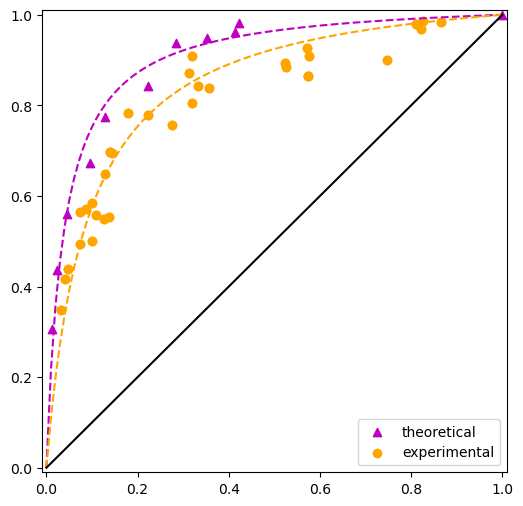

In [8]:
xx = np.arange(0,1.01,0.01)

plt.subplots(figsize=(6,6))

plt.scatter(SImean['sparse'],SImean['dense'],marker='^',color = 'm',label='theoretical')
plt.scatter(fournier['SI_SN'],fournier['SI_DN'],marker='o',color = 'orange',label='experimental')
plt.legend()

curveModel = fn.curveSNDN(xx,kModel)
plt.plot(xx,curveModel,color = 'm',linestyle='dashed')
    
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])


plt.scatter(fournier['SI_SN'],fournier['SI_DN'],color = 'orange')

curveExp = fn.curveSNDN(xx,kExp)
plt.plot(xx,curveExp,color = 'orange',linestyle='dashed')
    
plt.plot(xx,xx,color='k')
#plt.savefig('data/FournierFits.eps', format='eps', dpi=1200)
plt.show()

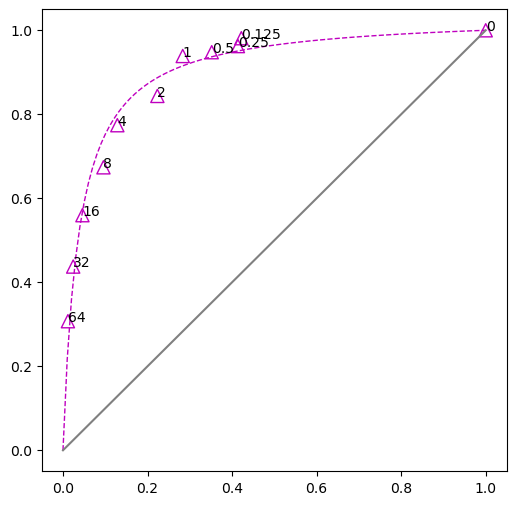

In [9]:
xx = np.arange(0,1.01,0.01)

plt.subplots(figsize=(6,6))
plt.scatter(SImean['sparse'],SImean['dense'],marker='^',s=90,linewidths=1,facecolors='none',color = 'm',label='theoretical')

curveModel = fn.curveSNDN(xx,kModel)
plt.plot(xx,curveModel,color = 'm',linestyle='dashed',linewidth=1)

for i, lamda in enumerate(lamdas):
    plt.annotate(lamda, (SImean['sparse'][i],SImean['dense'][i]))
    
plt.xlim([-0.05,1.05]);plt.ylim([-0.05,1.05])

plt.plot(xx,xx,color='gray')
#plt.savefig('data/FournierTheoreticalFit.eps', format='eps', dpi=1200)
plt.show()

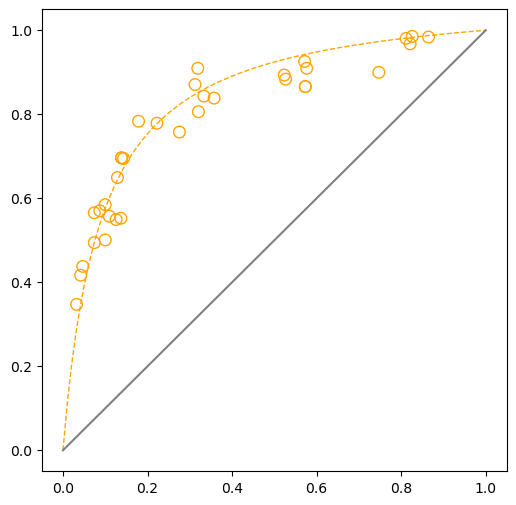

In [10]:
xx = np.arange(0,1.01,0.01)

plt.subplots(figsize=(6,6))

plt.scatter(fournier['SI_SN'],fournier['SI_DN'],marker='o',s=70,linewidths=1,facecolors='none',color = 'orange',label='experimental')

plt.xlim([-0.05,1.05]);plt.ylim([-0.05,1.05])

curveExp = fn.curveSNDN(xx,kExp)
plt.plot(xx,curveExp,color = 'orange',linestyle='dashed',linewidth=1)
    
plt.plot(xx,xx,color='gray')
#plt.savefig('data/FournierExperimentalFits.eps', format='eps', dpi=1200)
plt.show()